In [1]:
#Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#Check the tensorflow version after importing
print(tf.__version__)

2.0.0-rc0


In [3]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load the MNIST Fashion dataset
mnist=keras.datasets.fashion_mnist

In [5]:
#Check the type of the dataset that was obtained in previous step
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
#Load this data into the noteboot
#This will be loaded as two Tuples by default
#One Tuple will be Training Dataset--- we name it as (X_train,y_train)
#Second Tuple will be Test Dataset---- we name it as (X_test,y_test)
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [7]:
#View the shape of X_train
X_train.shape

(60000, 28, 28)

In [8]:
#View the shape of y_train
y_train.shape

(60000,)

In [9]:
#View the shape of X_test
X_test.shape

(10000, 28, 28)

In [10]:
#View the shape of y_test
y_test.shape

(10000,)

In [11]:
#View the X_train
X_train
#As the dataset comprises grey scale images,most of the values are zeroes

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
#View the maximum value in X_train
np.max(X_train)
#255 because the images are represented in the form of pixels with value between 0 to 255

255

In [13]:
#View the average value in X_train
np.mean(X_train)

72.94035223214286

In [14]:
#View the shape of X_train and y_train
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [15]:
#The data is classified into 10 labels meaning there are 10 types of clothes
#present in this dataset. These are encoded as labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
#View all the labels that y_train is containing
#This is nothing but the class of labels
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
#Store the label names
class_names=['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [18]:
class_names

['Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# EDA

In [19]:
#We have 60000 images available for training
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [20]:
#We have 10000 images available for testing
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

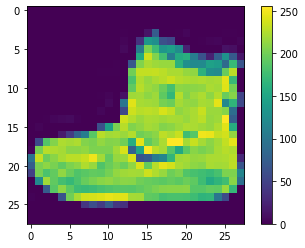

In [21]:
#View first image in X_train
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
#The color bar is showing the pixel values in the range 0----->255
# IN X-Axis,Y-axis the values are 28*28 meaning
#The image is represented in 28*28 matrice with pixel values ranging between 0---255

In [22]:
#To know what it is let us check the first label
y_train[0]
#9	Ankle boot

9

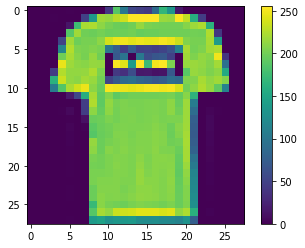

In [23]:
#View second image in X_train
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [24]:
#To know what it is let us check the second label
y_train[1]
#0	T-shirt/top

0

In [25]:
#Since, Neural Network Model doesn't take values more than 1
#The image pixel values are represented between the values 0 and 255
#We will bring this window to somewhere between zero and one
#So we divide the pixel values by 255
#This is performed on the entire dataset i.e. X_train,X_test
#Bring down the value of X_train to the range 0---->1
X_train=X_train/255.0

In [26]:
#Bring down the value of X_test to the range 0---->1
X_test=X_test/255.0

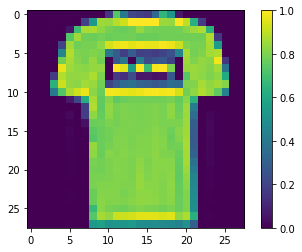

In [27]:
# Now, let us view the same figure
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
#We notice the image is same. But, the color bar calibration changed
#from 0---->255 to 0---->1

# Model Building

In [28]:
#Code for Neural Network Layers
#import the keras and sequential layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [29]:
#We pass the layers to the sequential model
model=Sequential([
    
])

In [30]:
#Flatten Layer- 
###It transforms the 28*28 matrice to 1-D
###So that it can be fed to next layer

#Dense Layer
###Units is number of neurons that we want
###We are passing 128 neurons in the first layer
###Activation function we are using here is relu

#Output Layer
### We have 10 classes, so there will be 10 neurons
###Activation function we use here is softmax
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
#Model Summary
model.summary()
#Output of flatten layer is 784. This is because the 28*28 is converted into a single dimension
#This is fed to the dense layer containing 128 neurons. The output here will be 128*784
#The output layer is having 10 neurons. So 10*128 approx 1290 results

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compile
- Loss Function: 
    - Measure how accurate is the model during     training and testing
    - Loss function minimises error during the training
    - Then testing error also will be minimized(not always true)
    - Because, if the model is overfit, overall loss will be minimized during training, but the loss increases during testing
    - So, this is where optimizer comes
- Optimizer
- Metrics

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model

In [33]:
#Pass the batch size
#Create a history variable to store the loss and accuracy of the epochs
#Check if the model is overfitting or not by passing a validation_set parameter
#Increase the batch size to 100
#Looking at the model accuracy,loss and Validation accuracy and loss, we understand that the model is overfitting
history=model.fit(X_train,y_train,epochs=10,batch_size=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 80us/sample - loss: 0.5592 - accuracy: 0.8069 - val_loss: 0.4521 - val_accuracy: 0.8393
Epoch 2/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.4073 - accuracy: 0.8579 - val_loss: 0.4215 - val_accuracy: 0.8460
Epoch 3/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3681 - accuracy: 0.8686 - val_loss: 0.3850 - val_accuracy: 0.8622
Epoch 4/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3401 - accuracy: 0.8781 - val_loss: 0.3703 - val_accuracy: 0.8675
Epoch 5/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.3192 - accuracy: 0.8847 - val_loss: 0.3448 - val_accuracy: 0.8761
Epoch 6/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3029 - accuracy: 0.8900 - val_loss: 0.3409 - val_accuracy: 0.8794
Epoch 7/10
48000/48000 [==============================] 

# Model Evaluation

In [34]:
#Accuracy of test data
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)
#During training, the accuracy was 91.03%
#In the testing, the accuracy is 88.32% which is ok
#This shows overfitting of our model
#This is a very simple single layer Neural Network Model
#Single hidden layer with 128 neurons

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8798


# Prediction

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred=model.predict_classes(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8798

# Plotting Learning Curve

In [39]:
#see what is present in history
history.history
#This will be a dcitionary with loss,accuracy,val_loss(validation loss),val_accuracy(validation accuracy)

{'loss': [0.559195452183485,
  0.40725566241890193,
  0.36810120608036717,
  0.340061009892573,
  0.3191571862436831,
  0.3029389248229563,
  0.28853208109115563,
  0.27782364692538974,
  0.2655466838739812,
  0.25868746178845564],
 'accuracy': [0.8069375,
  0.8579375,
  0.8685833,
  0.878125,
  0.8846875,
  0.89004165,
  0.8942292,
  0.8985,
  0.9018958,
  0.90535414],
 'val_loss': [0.45210718909899394,
  0.42149600212772687,
  0.3850323539227247,
  0.3703223895281553,
  0.34478922858834266,
  0.3409368603179852,
  0.3277498143414656,
  0.34422073923051355,
  0.32745812833309174,
  0.3185168830056985],
 'val_accuracy': [0.83925,
  0.846,
  0.86225,
  0.8675,
  0.8760833,
  0.87941664,
  0.88491666,
  0.88058335,
  0.8825,
  0.8864167]}

In [40]:
import matplotlib.pyplot as plt

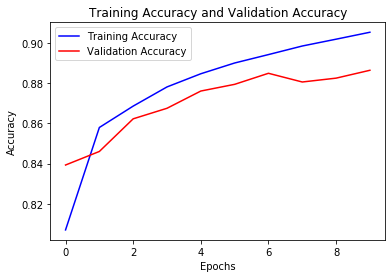

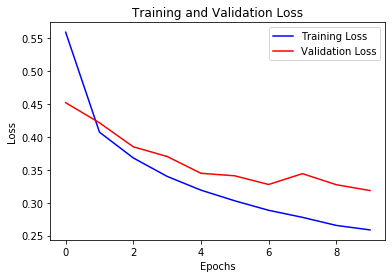

In [42]:
#Plot training and validation accuracy
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('Training Accuracy and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='upper left')
plt.show()

#Plot Training and Validation Loss
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'],loc='upper right')
plt.show()

## Plot Confusion Matrix

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [44]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

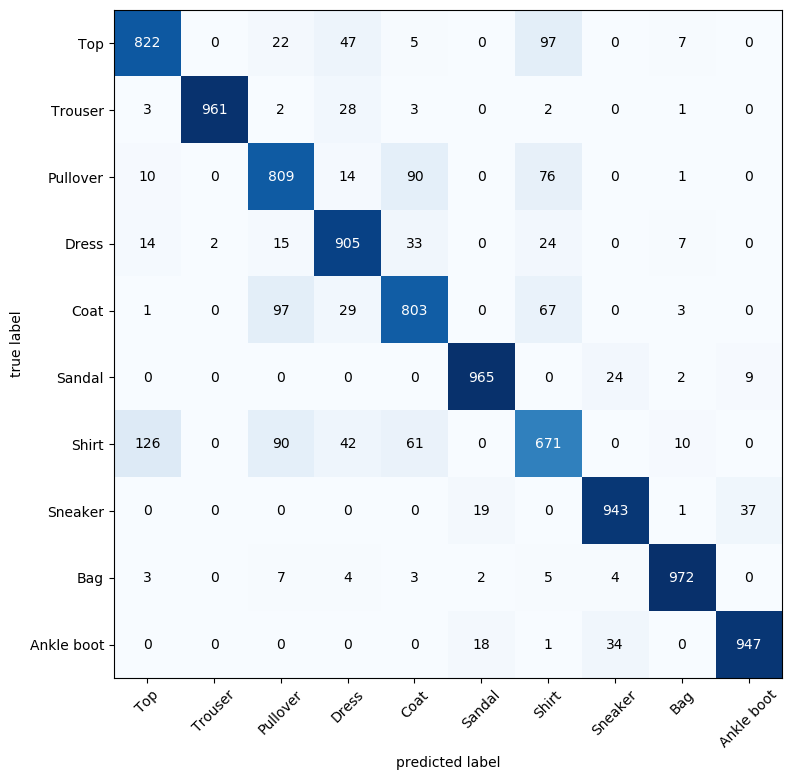

In [46]:
mat=confusion_matrix(y_test,y_pred)
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=False)
plt.tight_layout()
#The following line will save the confusion matrix figure to the home location
fig.savefig('cm.png')

In [ ]:
#What does history object contain?
#A `History` object. Its `History.history` attribute is
#a record of training loss values and metrics values
#at successive epochs, as well as validation loss values
#and validation metrics values (if applicable).
#Create a variable history and put it during the training
#Let us view what is present in the history object
history

In [ ]:
history.history

In [ ]:
type(history.history)

In [ ]:
#import necessary packages for plotting
import matplotlib.pyplot as plt

In [ ]:
#Check if the model is overfitting or not by passing a validation_set parameter
#When training accuracy is more than the validation accuracy, then model is overfitting
#If we take a look at the learning curve


#Plot Model accuracy for training data
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy','Validation accuracy'],loc='upper left')
plt.show()

#plot Model Loss for Training data
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss','validation loss'],loc='upper right')
plt.show()

## Plot Confusion Matrix

In [ ]:
#Open Anaconda Command Prompt in Administrator mode
#pip install mlxtend
#Or install it here in jupyter itself by executing the below command
#!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#Store the confusion matrix in a variable
mat=confusion_matrix(y_test,y_pred)
#plot_confusion_matrix(conf_mat=mat)

#Increase the size of the confusion matrix
#plot_confusion_matrix(conf_mat=mat,figsize=(8,8))

#Print the classes name as well
#plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names)

#Print accuracy of each class
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)

In [ ]:
#Change the font,width of the boxes to bold and times new roman
import matplotlib


#Create a dictionary of fonts
font={
    'family':'Times New Roman',
    'weight':'bold',
    'size':16
}
matplotlib.rc ('font',**font)
mat=confusion_matrix(y_test,y_pred)

#Print accuracy of each class
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)

In [ ]:
#Change the font,width of the boxes to times new roman+
#We are removing the bold
import matplotlib


#Create a dictionary of fonts
font={
    'family':'Times New Roman',
    'size':16
}
matplotlib.rc ('font',**font)
mat=confusion_matrix(y_test,y_pred)

#Print accuracy of each class
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)